In [ ]:
# Step 1: Import Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
# Step 2: Load Dataset

In [13]:
# Load your Kaggle Netflix dataset
df = pd.read_csv("Netflix.csv")

# Show first few rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-09-2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,24-09-2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",NaN,NaN,24-09-2021,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-09-2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-09-2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [5]:
# Step 3: Basic Information

In [14]:
# print("Dataset Info:")
# print(df.info())

print("Missing Values:")
print(df.isnull().sum())


Missing Values:
show_id         0
type            0
title           0
director        0
cast            5
country         5
date_added      4
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [35]:
# Step 4: Clean Data (optional but important)

In [10]:
# Fill missing values where possible
df['country'].fillna('Unknown')
df['rating'].fillna('Not Rated')
df['duration'].fillna('Unknown')
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      4
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [25]:
#BUT WE CAN SEE THE DIRECTOR AND CAST , DATE_ADDED ARE STILL THERE SO WE HAVE T0 REMOVE NULL ROWS
df =df.dropna(subset =['cast'])
df = df.dropna(subset =['director'])
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
# Step 5: Exploratory Data Analysis (EDA)

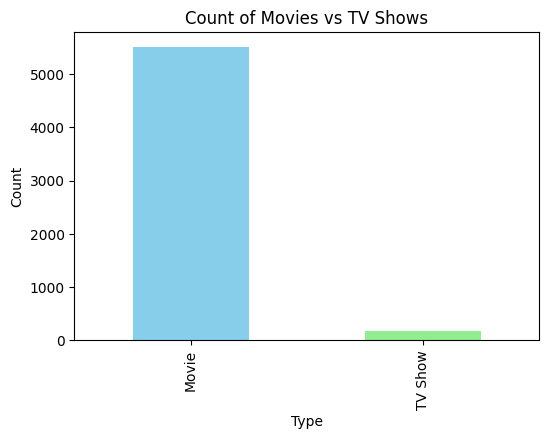

In [26]:
#Count of Movies vs TV shows
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar', color=['skyblue','lightgreen'])
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


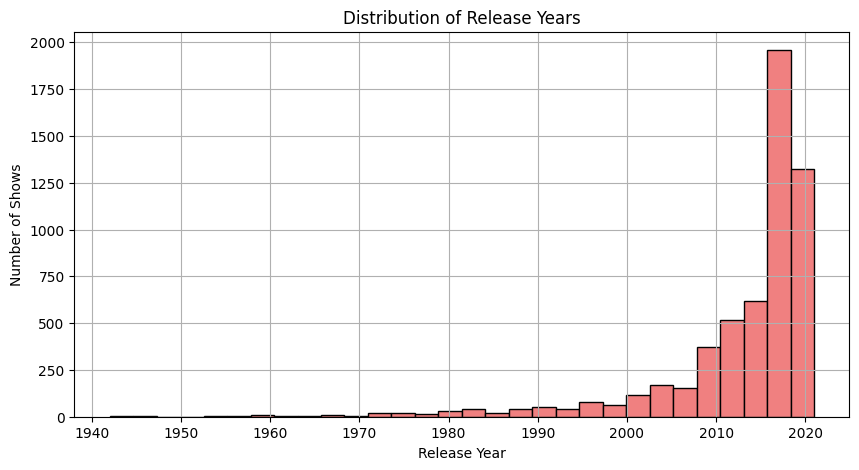

In [48]:
# Distribution of release year
plt.figure(figsize=(10,5))
df['release_year'].hist(bins=30, color='lightcoral', edgecolor='black')
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Shows")
plt.show()


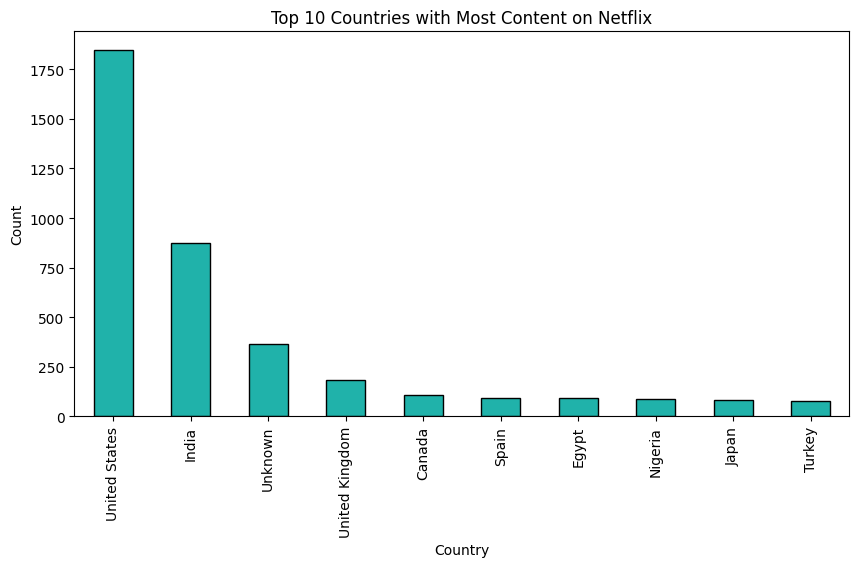

In [29]:
# Top 10 Countries with Most Content
plt.figure(figsize=(10,5))
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title("Top 10 Countries with Most Content on Netflix")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


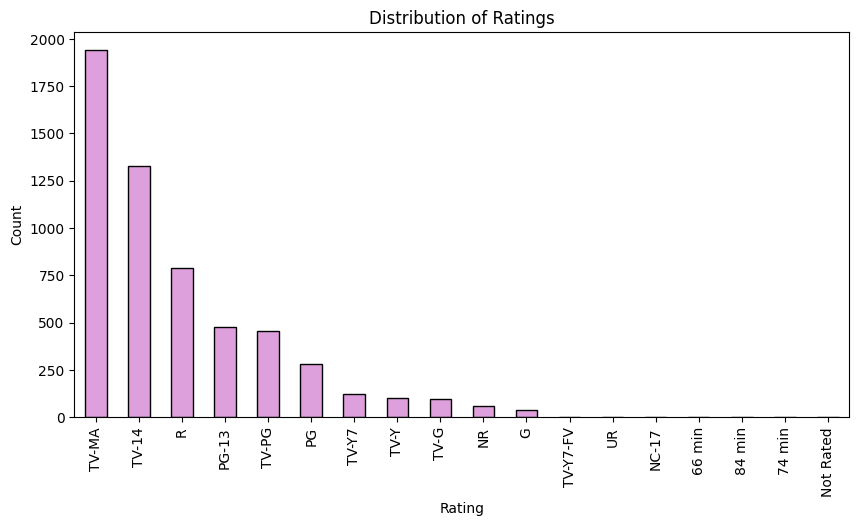

In [30]:
# Distribution of Ratings
plt.figure(figsize=(10,5))
df['rating'].value_counts().plot(kind='bar', color='plum', edgecolor='black')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [57]:
# We want to convert the 'date_added' column — which is currently a string (text) like "September 9, 2019"
# into a datetime object (a real date that Python can understand and use for time-based analysis).
# Step 1: df['date_added']

# This picks the “date_added” column from your DataFrame so we’re working with a Series of text values 

# Step 2: pd.to_datetime(...)

# This Pandas function tries to convert each value into a datetime64 object.

# After conversion, each value becomes object.

# Step 3: errors='coerce'

# This part tells pandas what to do if a value cannot be converted to a date.

# If you don’t use it, and one date is invalid (say "unknown"), pandas will throw an error .

# With errors='coerce', pandas will replace invalid or blank values with NaT .

# NaT = “Not a Time”, used for missing or invalid dates (like NaN for numbers).

# Step 4: df['date_added'] = ...

# We assign the converted result back to the same column, replacing the old string values.

# So now df['date_added'] is a proper datetime column.

# In Simple Words:

# This line converts text dates into actual date objects. Invalid or blank dates are safely turned into “NaT” (Not a Time).
#  It prepares the column for time based analysis like trends per year/month.

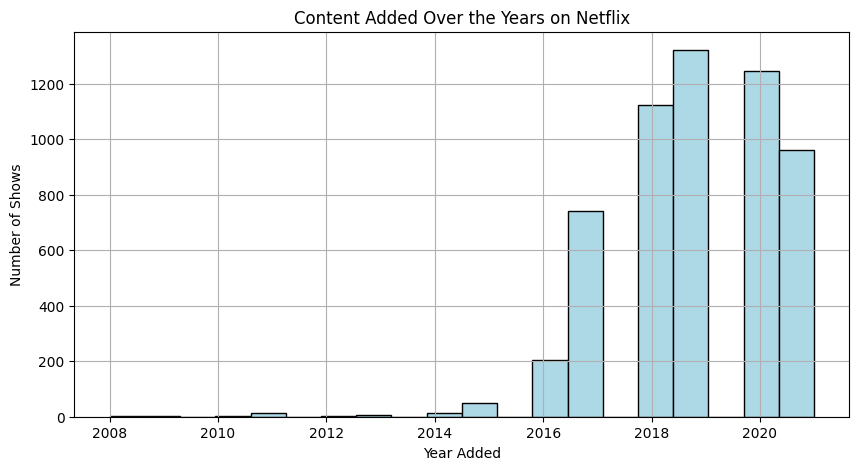

In [32]:
# Frequency of Shows Added Over Time
# Convert date_added column to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

plt.figure(figsize=(10,5))
df['date_added'].dt.year.hist(bins=20, color='lightblue', edgecolor='black')
plt.title("Content Added Over the Years on Netflix")
plt.xlabel("Year Added")
plt.ylabel("Number of Shows")
plt.show()


In [58]:
# We want to find out:

# “Which genres appear most often in Netflix shows?”
# step1 : from collections import Counter

# Counter is a special tool from Python’s collections module.

# It helps you count how many times each item appears in a list — just like a frequency table.

# S️tep 2: df['listed_in'].dropna()

# Removes rows where the “listed_in” column is NaN (missing values).

# Because missing genres can cause errors when we try to split them later.

# ️Step 3 .str.split(', ')

# Splits each string wherever there is a comma followed by a space (, ).

# It converts each cell from a string to a list of genres.

# STEP 4: genres_flat = [genre for sublist in all_genres for genre in sublist]

# This is a list comprehension that flattens the list of lists.

# Let’s break that down:

# for sublist in all_genres → goes through each inner list

# for genre in sublist → goes through each genre inside that list

# So the result is a single flat list of all genres.

# ️STEP 5: genre_counts = Counter(genres_flat).most_common(10)

# Counter(genres_flat) → counts how many times each genre appears.

# .most_common(10) → gets the top 10 genres with their counts.

# In Simple Words

# You took the “listed_in” column that had multiple genres in one cell,
# split them into individual words, combined them all in one big list,
# and then counted which genres appear most often.

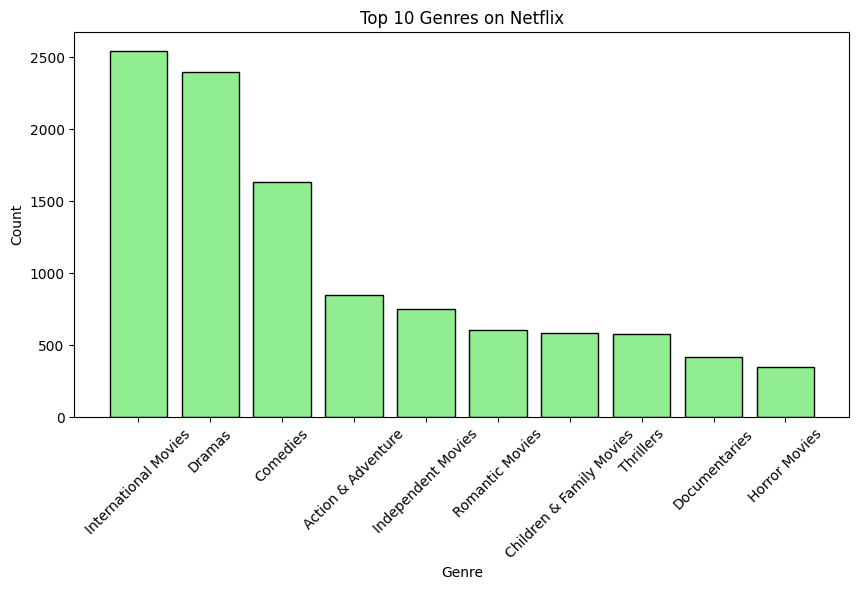

In [33]:
# Top 10 Genres on Netflix
# Split 'listed_in' into individual genres
from collections import Counter

all_genres = df['listed_in'].dropna().str.split(', ')
genres_flat = [genre for sublist in all_genres for genre in sublist]
genre_counts = Counter(genres_flat).most_common(10)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

plt.figure(figsize=(10,5))
plt.bar(genre_df['Genre'], genre_df['Count'], color='lightgreen', edgecolor='black')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [37]:
df.to_csv("Netflix.csv", index=False)
